In [2]:
import numpy as np
import pandas as pd

In [3]:
!pip install keras

In [3]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.layers import Dense, Input, concatenate, Dropout
from keras.models import Model
from keras.optimizers import rmsprop

Using TensorFlow backend.


In [5]:
data = pd.read_excel('detail_address_analysis.xlsx')

In [6]:
data

,Unnamed: 0,report_time_simple,report_time,지점,주소,cause,status,result,mountain,인접산,...,강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),적설(cm),지면온도(°C),Unnamed: 0.1,address,simple_report_time
0,0,2010-01-01 07:00:00,2010-01-01 07:49:00,태백,강원도 태백시 혈동,산악기타,경상,인명구조,강원도 태백시 혈동 산,태백산,...,0.0,2.2,29.0,-26.6,930.0,0.0,-12.6,0.0,강원도 태백시 혈동,2010-01-01 07:00:00
1,1,2010-01-01 11:00:00,2010-01-01 11:16:00,태백,강원도 태백시 혈동,개인(급.만성)질환,기타,인명구조,강원도 태백시 혈동 산,태백산,...,0.0,2.5,39.0,-19.5,930.7,0.0,-5.2,1.0,강원도 태백시 혈동,2010-01-01 11:00:00
2,2,2010-01-01 11:00:00,2010-01-01 11:31:00,태백,강원도 태백시 소도동,일반조난,미상,인명검색,강원도 태백시 소도동 산,태백산,...,0.0,2.5,39.0,-19.5,930.7,0.0,-5.2,2.0,강원도 태백시 소도동,2010-01-01 11:00:00
3,3,2010-01-02 07:00:00,2010-01-02 07:44:00,태백,강원도 태백시 황지동,산악기타,경상,인명구조,강원도 태백시 황지동 산,함백산,...,0.0,3.3,80.0,-8.8,929.3,0.0,-7.0,3.0,강원도 태백시 황지동,2010-01-02 07:00:00
4,4,2010-01-02 11:00:00,2010-01-02 11:34:00,태백,강원도 태백시 소도동,산악기타,안전구조,인명구조,강원도 태백시 소도동 산,태백산,...,0.0,3.4,80.0,-3.2,927.3,0.0,-1.6,4.0,강원도 태백시 소도동,2010-01-02 11:00:00
5,5,2010-01-02 16:00:00,2010-01-02 16:37:00,태백,강원도 태백시 소도동,산악기타,안전구조,인명구조,강원도 태백시 소도동 산,태백산,...,0.0,1.0,82.0,-2.6,926.4,0.0,-0.5,5.0,강원도 태백시 소도동 18-0,2010-01-02 16:00:00
6,6,2010-01-01 00:00:00,2010-01-01 00:12:00,남원,전라북도 남원시 운봉읍 공안리,일반조난,기타,인명구조,전라북도 남원시 운봉읍 공안리 산,세걸산,...,0.0,0.8,87.0,-18.1,1011.8,13.8,-2.1,6.0,전라북도 남원시 운봉읍 공안리 19,2010-01-01 00:00:00
7,7,2010-01-01 05:00:00,2010-01-01 05:43:00,진도,전라남도 진도군 진도읍 남동리,일반조난,기타,안전조치,전라남도 진도군 진도읍 남동리 산,남산,...,0.0,5.9,92.0,-6.6,962.6,1.6,0.2,7.0,전라남도 진도군 진도읍 남동리 745-5,2010-01-01 05:00:00
8,8,2010-01-01 06:00:00,2010-01-01 06:25:00,서울,서울특별시 관악구 봉천동,실족추락,미상,인명구조,서울특별시 관악구 봉천동 산,청룡산,...,0.0,1.6,57.0,-19.1,1012.2,2.2,-7.1,9.0,서울특별시 관악구 봉천동,2010-01-01 06:00:00
9,9,2010-01-01 06:00:00,2010-01-01 06:31:00,안동,경기도 광명시 하안동,실족추락,경상,인명구조,경기도 광명시 하안동 산,구름산,...,0.0,3.1,39.0,-20.7,1003.4,0.0,-10.6,10.0,경기도 광명시 하안동 (산) 10,2010-01-01 06:00:00


In [7]:
column_list = df.columns.to_list()

NameError: name 'df' is not defined

In [355]:
column_list = column_list[0:6]

In [356]:
df[column_list]

,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),적설(cm)
0,-12.2,0.0,2.2,29.0,-26.6,0.0
1,-8.0,0.0,2.5,39.0,-19.5,0.0
2,-8.0,0.0,2.5,39.0,-19.5,0.0
3,-6.0,0.0,3.3,80.0,-8.8,0.0
4,-0.2,0.0,3.4,80.0,-3.2,0.0
5,0.1,0.0,1.0,82.0,-2.6,0.0
6,-16.5,0.0,0.8,87.0,-18.1,13.8
7,-5.6,0.0,5.9,92.0,-6.6,1.6
8,-5.6,0.0,5.9,92.0,-6.6,1.6
9,-12.4,0.0,1.6,57.0,-19.1,2.2


In [8]:
raw_data = data.copy()

In [641]:
data = raw_data.copy()

In [10]:
target = pd.DataFrame(data['cause'])

In [11]:
df = data[['기온(°C)', '강수량(mm)','풍속(m/s)','습도(%)', '이슬점온도(°C)', '적설(cm)','지면온도(°C)']]

In [12]:
df

,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),적설(cm),지면온도(°C)
0,-12.2,0.0,2.2,29.0,-26.6,0.0,-12.6
1,-8.0,0.0,2.5,39.0,-19.5,0.0,-5.2
2,-8.0,0.0,2.5,39.0,-19.5,0.0,-5.2
3,-6.0,0.0,3.3,80.0,-8.8,0.0,-7.0
4,-0.2,0.0,3.4,80.0,-3.2,0.0,-1.6
5,0.1,0.0,1.0,82.0,-2.6,0.0,-0.5
6,-16.5,0.0,0.8,87.0,-18.1,13.8,-2.1
7,-5.6,0.0,5.9,92.0,-6.6,1.6,0.2
8,-12.4,0.0,1.6,57.0,-19.1,2.2,-7.1
9,-9.3,0.0,3.1,39.0,-20.7,0.0,-10.6


In [13]:
target

,cause
0,산악기타
1,개인(급.만성)질환
2,일반조난
3,산악기타
4,산악기타
5,산악기타
6,일반조난
7,일반조난
8,실족추락
9,실족추락


In [14]:
## 레이블링 방법 1

target.replace({'개인(급.만성)질환':1}, inplace= True)
target.replace({'개인질환':1}, inplace= True)
target.replace({'고온환경질환':0}, inplace= True)
target.replace({'기타산악':1}, inplace= True)
target.replace({'낙석·낙빙':0}, inplace= True)
target.replace({'산악기타':2}, inplace= True)
target.replace({'실족추락':2}, inplace= True)
target.replace({'암벽등반':2}, inplace= True)
target.replace({'야생식물 섭취 중독':1}, inplace= True)
target.replace({'일반조난':2}, inplace= True)
target.replace({'저체온증':0}, inplace= True)
target.replace({'탈진·탈수':0}, inplace= True)
target.replace({'자살기도(산악)':1}, inplace= True)

In [599]:
## 레이블링 방법 1

target.replace({'개인(급.만성)질환':2}, inplace= True)
target.replace({'개인질환':2}, inplace= True)
target.replace({'고온환경질환':1}, inplace= True)
target.replace({'기타산악':2}, inplace= True)
target.replace({'낙석·낙빙':1}, inplace= True)
target.replace({'산악기타':3}, inplace= True)
target.replace({'실족추락':3}, inplace= True)
target.replace({'암벽등반':3}, inplace= True)
target.replace({'야생식물 섭취 중독':2}, inplace= True)
target.replace({'일반조난':3}, inplace= True)
target.replace({'저체온증':1}, inplace= True)
target.replace({'탈진·탈수':1}, inplace= True)
target.replace({'자살기도(산악)':2}, inplace= True)

In [103]:
## 레이블링 방법 2

target.replace({'개인(급.만성)질환':1}, inplace= True)
target.replace({'개인질환':2}, inplace= True)
target.replace({'고온환경질환':3}, inplace= True)
target.replace({'기타산악':4}, inplace= True)
target.replace({'낙석·낙빙':5}, inplace= True)
target.replace({'산악기타':6}, inplace= True)
target.replace({'실족추락':7}, inplace= True)
target.replace({'암벽등반':8}, inplace= True)
target.replace({'야생식물 섭취 중독':9}, inplace= True)
target.replace({'일반조난':10}, inplace= True)
target.replace({'저체온증':11}, inplace= True)
target.replace({'탈진·탈수':12}, inplace= True)
target.replace({'자살기도(산악)':13}, inplace= True)

In [104]:
## 레이블링 방법 3

target.replace({1:2}, inplace= True)
target.replace({2:2}, inplace= True)
target.replace({3:2}, inplace= True)
target.replace({4:1}, inplace= True)
target.replace({5:3}, inplace= True)
target.replace({6:3}, inplace= True)
target.replace({7:5}, inplace= True)
target.replace({8:5}, inplace= True)
target.replace({9:1}, inplace= True)
target.replace({10:4}, inplace= True)
target.replace({11:2}, inplace= True)
target.replace({12:2}, inplace= True)
target.replace({13:1}, inplace= True)

In [647]:
target

,사고원인
0,2
1,1
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [54]:
target

,사고원인
0,3
1,2
2,4
3,3
4,3
5,3
6,4
7,4
8,4
9,5


## DUMMY

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.utils import check_X_y

In [20]:
dummy = DummyClassifier()

X_converted, y_converted = check_X_y(X=X_train, y= y_train)
X_converted_test, y_converted_test = check_X_y(X=X_test, y=y_test)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
dummy.fit(X=X_converted, y=y_converted)
dummy_pred = dummy.predict(X_converted_test)

In [22]:
dummy.score(X_test, dummy_pred)

0.6625464887333188

## KNN

In [17]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.25, stratify = target)

In [24]:
X_train.shape

(54849, 7)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier()

In [27]:
knn.fit(X_train, y_train)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
knn.predict(X_test)

array([2, 2, 0, ..., 2, 2, 1], dtype=int64)

In [29]:
knn.score(X_test, y_test)

0.7519689345876176

## Naive bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nb = GaussianNB()

In [32]:
nb.fit(abs(X_train), abs(y_train))

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
nb.score(X_test, y_test)

0.7870269087726974

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier()

In [36]:
rf.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
rf.score(X_test, y_test)

0.7592430540363159

## Neural Network

In [38]:
import tensorflow as tf

In [39]:
X_trainND = X_train.values
y_trainND = y_train.values
X_testND, y_testND = X_test.values, y_test.values

In [40]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale

In [41]:
X_scaled_train, y_scaled_train = minmax_scale(X_train), minmax_scale(y_train)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  """Entry point for launching an IPython kernel.


In [42]:
X_scaled_test, y_scaled_test = minmax_scale(X_test), minmax_scale(y_test)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  """Entry point for launching an IPython kernel.


In [605]:
def create_model():
    model = Sequential()
    model.add(Dense(512, activation=tf.nn.relu))
    model.add(Dropout(0,6))
    model.add(Dense(256, activation=tf.nn.relu))
    model.add(Dropout(0,4))
    model.add(Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0,2))
    model.add(Dense(3,activation = tf.nn.softmax))
    model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
    return model

In [613]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(axis=1),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [614]:
model1.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [43]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(axis=1),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])
model2.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

W0820 16:19:12.155148  6128 deprecation.py:506] From C:\anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [44]:
model2.fit(X_trainND, y_trainND, epochs=5, shuffle = True)

W0820 16:19:14.133858  6128 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Epoch 1/5
54849/54849 [==============================] - 7s 134us/sample - loss: 0.5824 - acc: 0.7903
Epoch 2/5
54849/54849 [==============================] - 7s 119us/sample - loss: 0.5691 - acc: 0.7907
Epoch 3/5
54849/54849 [==============================] - 6s 118us/sample - loss: 0.5679 - acc: 0.7907
Epoch 4/5
54849/54849 [==============================] - 7s 119us/sample - loss: 0.5663 - acc: 0.7907
Epoch 5/5
54849/54849 [==============================] - 6s 118us/sample - loss: 0.5661 - acc: 0.7907


In [45]:
model2.evaluate(X_testND, y_testND)

18284/18284 [==============================] - 1s 41us/sample - loss: 0.5621 - acc: 0.7907


[0.5621225719664713, 0.79074603]

In [657]:
X_testND.shape

(20867, 7)

In [64]:
model2.predict_proba(X_testND)

array([[0.0153294 , 0.21602398, 0.7686466 ],
       [0.01643899, 0.192825  , 0.7907361 ],
       [0.03927142, 0.22943468, 0.7312939 ],
       ...,
       [0.01329281, 0.17598452, 0.81072265],
       [0.0106311 , 0.1911766 , 0.7981923 ],
       [0.01171973, 0.16884829, 0.81943196]], dtype=float32)

In [47]:
predict_probability = pd.DataFrame(model2.predict_proba(X_testND), columns=['날씨에의한사고', '산악사고가아닌사고', '산악사고'])

In [48]:
predict_probability

,날씨에의한사고,산악사고가아닌사고,산악사고
0,0.015329,0.216024,0.768647
1,0.016439,0.192825,0.790736
2,0.039271,0.229435,0.731294
3,0.016953,0.198241,0.784806
4,0.014801,0.198578,0.786621
5,0.009881,0.142983,0.847135
6,0.012500,0.179357,0.808143
7,0.014952,0.227893,0.757155
8,0.015515,0.218002,0.766483
9,0.011590,0.183201,0.805209


### 지수화

In [804]:
value = pd.DataFrame((predict_probability['날씨에의한사고'] + predict_probability['산악사고']) / predict_probability['산악사고가아닌사고'])

In [809]:
value1 = predict_probability['날씨에의한사고'] / predict_probability['산악사고가아닌사고']

In [813]:
value2 = predict_probability['산악사고'] / predict_probability['산악사고가아닌사고']

In [810]:
min_max1 =(value1-value1.min()) / (value1.max() - value1.min())

In [814]:
min_max2 =(value2-value2.min()) / (value2.max() - value2.min())

In [805]:
value.max()

0    94.358215
dtype: float32

In [806]:
value.min()

0    3.392908
dtype: float32

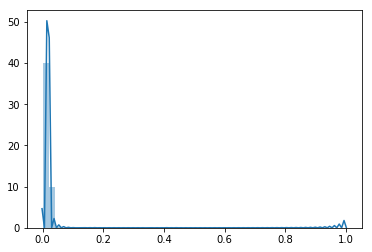

In [815]:
sns.distplot(min_max2)

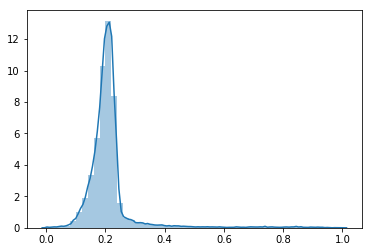

In [812]:
sns.distplot(min_max1)

In [692]:
min_mix = (value-value.min()) / (value.max() - value.min())

In [808]:
model2.predict(real_test)

array([[0.01097752, 0.18501095, 0.80401146],
       [0.01267606, 0.19086981, 0.7964541 ],
       [0.00262633, 0.12047397, 0.87689966]], dtype=float32)

In [705]:
temp = minmax_scale(value)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype float32 were all converted to float64.
  """Entry point for launching an IPython kernel.


In [713]:
from sklearn.preprocessing import StandardScaler

In [726]:
std = StandardScaler(value, with_mean=0, with_std=0)

In [736]:
valueND = value.to_numpy()

In [757]:
value_mean = value.mean()

In [758]:
value_mean = value_mean.values[0]

In [759]:
value_std = value.std()

In [760]:
value_std = value_std.values[0]

In [762]:
scaled_value = (value - value_mean) / value_std

In [770]:
scaled_value

,0
0,-0.156883
1,0.092896
2,-0.542311
3,-0.197866
4,0.270408
5,-0.417407
6,0.160345
7,-0.077119
8,-0.546788
9,-0.377507


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018321A0B470>]],
      dtype=object)

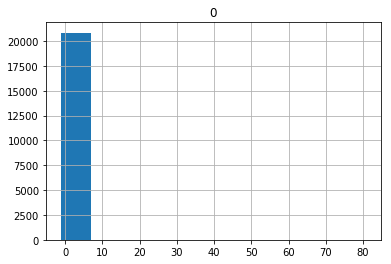

In [767]:
scaled_value.hist()

In [817]:
model2.predict(real_test)

0.01097752/0.80401146, 0.18501095/0.80401146
0.01097752/0.80401146, 0.18501095/0.80401146
0.01097752/0.80401146, 0.18501095/0.80401146

(0.013653437228369853, 0.23010984196668044)

In [830]:
value1.quantile(0.6)

0.0834925040602684

In [831]:
value2.quantile(0.6)

4.617175960540772

In [783]:
import seaborn as sns
import matplotlib.pylabs as plt

ModuleNotFoundError: No module named 'matplotlib.pylabs'

In [784]:
import pylab as plt

In [781]:
plt.clf()

AttributeError: module 'matplotlib' has no attribute 'clf'

(-5, 5)

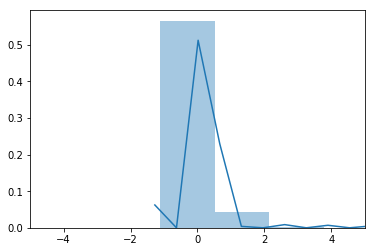

In [787]:
sns.distplot(scaled_value)
plt.xlim(-5, 5)

In [797]:
real_test = pd.DataFrame(np.array([[-1,0,2.7,25,-18.5,0,3.7], [-3.2,-.0,0.9,33,-17.2,0,2.3], [17.5,11.5,3.8,95,16.6,0,18.7]]) )

In [799]:
model2.predict(real_test)

array([[0.01097752, 0.18501095, 0.80401146],
       [0.01267606, 0.19086981, 0.7964541 ],
       [0.00262633, 0.12047397, 0.87689966]], dtype=float32)

In [ ]:
def scaling:
    

In [795]:
real_test

,0,1,2,3,4,5,6
0,-1.0,0.0,2.7,25.0,-18.5,0.0,3.7
1,-3.2,-0.0,0.9,33.0,-17.2,0.0,2.3


In [788]:
df

,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),적설(cm),지면온도(°C)
0,-12.2,0.0,2.2,29.0,-26.6,0.0,-12.6
1,-8.0,0.0,2.5,39.0,-19.5,0.0,-5.2
2,-8.0,0.0,2.5,39.0,-19.5,0.0,-5.2
3,-6.0,0.0,3.3,80.0,-8.8,0.0,-7.0
4,-0.2,0.0,3.4,80.0,-3.2,0.0,-1.6
5,0.1,0.0,1.0,82.0,-2.6,0.0,-0.5
6,-16.5,0.0,0.8,87.0,-18.1,13.8,-2.1
7,-5.6,0.0,5.9,92.0,-6.6,1.6,0.2
8,-5.6,0.0,5.9,92.0,-6.6,1.6,0.2
9,-12.4,0.0,1.6,57.0,-19.1,2.2,-7.1


StandardScaler(copy=              0
0      4.465145
1      4.743032
2      4.036343
3      4.419550
4      4.940521
5      4.175303
6      4.818072
7      4.553885
8      4.031362
9      4.219694
10     5.440825
11     4.414264
12     4.475639
13     4.657158
14     4.702890
15     4.991509
16     4.840096
17     ...  4.978834
20863  4.334406
20864  4.514038
20865  4.113144
20866  4.340503

[20867 rows x 1 columns],
        with_mean=0, with_std=0)

In [724]:
pd.DataFrame(value_std.data)

AttributeError: 'StandardScaler' object has no attribute 'data'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000183125CE3C8>]],
      dtype=object)

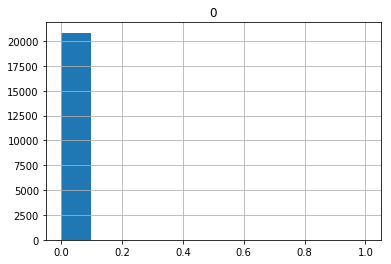

In [712]:
pd.DataFrame(temp).hist()

In [711]:
min_mix

,0
0,0.011787
1,0.014842
2,0.007073
3,0.011286
4,0.017013
5,0.008601
6,0.015667
7,0.012763
8,0.007019
9,0.009089


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000183205D94A8>]],
      dtype=object)

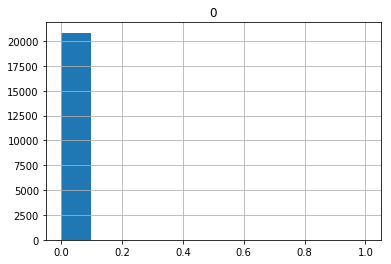

In [701]:
min_mix.hist()

In [696]:
last = min_mix * 100

In [698]:
last

,0
0,1.178732
1,1.484219
2,0.707341
3,1.128609
4,1.701322
5,0.860102
6,1.566711
7,1.276286
8,0.701865
9,0.908902


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001831D482390>]],
      dtype=object)

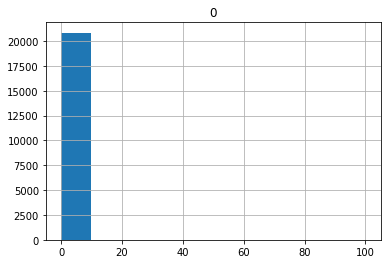

In [697]:
last.hist()

## XGBOOST

In [65]:
import xgboost as xgb
from matplotlib import pyplot

In [66]:
from xgboost import XGBClassifier

In [67]:
param = {'max_depth':4, 'eta':1, 'silent':1, 'objective':'binary:logistic'}

In [68]:
watchlist = [(, 'eval'), (dtrain, 'train')]

SyntaxError: invalid syntax (<ipython-input-68-d207d20f9231>, line 1)

In [69]:
bst = xgb.train(param, df, 1, watchlist)

NameError: name 'watchlist' is not defined

In [70]:
xgb = XGBClassifier()

In [71]:
temp.

SyntaxError: invalid syntax (<ipython-input-71-2110fd6e3163>, line 1)

<BarContainer object of 7 artists>

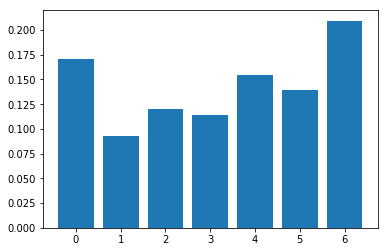

In [72]:
pyplot.bar(range(len(temp.feature_importances_)), temp.feature_importances_)

In [73]:
temp = xgb.fit(X_train, y_train)

In [74]:
y_pred = xgb.predict(X_test)

In [75]:
xgb.score(X_test, y_test)

0.7906366221833296

In [88]:
pd.to_pickle(xgb, 'xgboost')

In [84]:
X_test[0:1]

,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),적설(cm),지면온도(°C)
23879,21.8,0.0,2.6,28.0,2.4,0.0,32.8


In [85]:
xgb.predict_proba(X_test[0:1])

array([[0.01242578, 0.20171034, 0.7858639 ]], dtype=float32)

In [76]:
predictions = [round(value) for value in y_pred]

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy = accuracy_score(y_test, predictions)

In [79]:
print("Accuracy: %.2f%%" % (accuracy*100.0))

Accuracy: 79.06%


### GRID search in XGBoost

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
param_test1 = { 'max_depth' : range(3,10,2), 'min-chile_weight':range(1,6,2)}

In [197]:
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [ ]:
gsearch1.

In [198]:
gsearch1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min-chile_weight=1, min_child_weight=1, missing=None,
       n_estimators=140, n_jobs=1, nthread=4, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=None, subsample=0.8, verbosity=1)

In [207]:
gsearch1.best_score_

0.7921086176963139

In [203]:
gsearch1.score(X_test, y_test)

0.7925432501078258

In [205]:
pd.to_pickle(gsearch1, 'gridserachxgboost.pickle')

In [211]:
gsearch1.predict(X_test)

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [232]:
temp = pd.DataFrame(gsearch1.predict_proba(X_test), columns=['a','b','c'])

In [237]:
temp['d'] = (temp["a"] + temp['c']) / temp['b']

In [244]:
temp['d'].max()

40.14031

In [246]:
temp['d'].min()

0.58659697

In [247]:
temp['d'].mean()

4.530893802642822

In [222]:
gsearch1.predict_proba(X_test)[][:]

array([0.00663583, 0.15571463, 0.8376496 ], dtype=float32)

In [217]:
model1.predict_proba(X_test)

array([[4.47090720e-09, 1.21569615e-02, 2.22669750e-01, 7.65173018e-01,
        2.61461565e-07, 1.41398648e-09],
       [4.84949442e-06, 4.50500250e-02, 2.54631639e-01, 7.00235605e-01,
        7.53225904e-05, 2.67830865e-06],
       [5.16497636e-08, 1.79753881e-02, 2.12384000e-01, 7.69636333e-01,
        4.25683947e-06, 1.67466503e-08],
       ...,
       [6.08561246e-09, 1.30470712e-02, 1.78440094e-01, 8.08510423e-01,
        2.39893166e-06, 1.99448502e-09],
       [1.25806983e-08, 1.46458466e-02, 1.85648546e-01, 7.99702466e-01,
        3.10264909e-06, 4.22305035e-09],
       [9.95940574e-09, 1.44248353e-02, 1.83311716e-01, 8.02259922e-01,
        3.49103129e-06, 3.47420359e-09]], dtype=float32)

## SVM

In [1]:
from sklearn.svm import LinearSVC, SVC

In [378]:
svc = SVC(kernel='rbf')

In [379]:
svc.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [381]:
svc.score(X_test, y_test)

0.7923994824363828

## logistic Classifier

In [396]:
from sklearn.linear_model import LogisticRegressionCV

In [397]:
lr = LogisticRegressionCV()

In [398]:
lr.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [399]:
lr.score(X_test, y_test)

0.791968179422054

In [400]:
lr.class_weight

In [401]:
lr.coef_

array([[ 0.0026345 ,  0.00083977, -0.01947545,  0.00222588,  0.00289239,
        -0.00046743,  0.02135024],
       [-0.02708693, -0.01093542, -0.03823372,  0.00085186, -0.00324597,
        -0.02009274,  0.02647013],
       [ 0.02652294,  0.00936564,  0.04504451, -0.00097373,  0.00292846,
         0.01865134, -0.0278707 ]])

In [89]:
import tensorflow as tf
import keras

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Y_1hot = enc.fit_transform(Y.reshape(-1, 1)).toarray()

from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y_1hot, epochs=300, batch_size=10)
print('Model training is complete')

C:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
W0820 18:12:50.085960  6128 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 18:12:50.088952  6128 deprecation_wrapper.py:119] From C:\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeh

Epoch 1/300
150/150 [==============================] - 0s 2ms/step - loss: 1.6557 - acc: 0.3333
Epoch 2/300
150/150 [==============================] - 0s 160us/step - loss: 1.4835 - acc: 0.3333
Epoch 3/300
150/150 [==============================] - 0s 173us/step - loss: 1.3607 - acc: 0.3333
Epoch 4/300
150/150 [==============================] - 0s 512us/step - loss: 1.2711 - acc: 0.4267
Epoch 5/300
150/150 [==============================] - 0s 166us/step - loss: 1.2018 - acc: 0.4467
Epoch 6/300
150/150 [==============================] - 0s 186us/step - loss: 1.1459 - acc: 0.4600
Epoch 7/300
150/150 [==============================] - 0s 160us/step - loss: 1.1009 - acc: 0.4533
Epoch 8/300
150/150 [==============================] - 0s 359us/step - loss: 1.0643 - acc: 0.4067
Epoch 9/300
150/150 [==============================] - 0s 153us/step - loss: 1.0347 - acc: 0.3933
Epoch 10/300
150/150 [==============================] - 0s 286us/step - loss: 1.0097 - acc: 0.3933
Epoch 11/300
150/150 

Epoch 84/300
150/150 [==============================] - 0s 153us/step - loss: 0.5832 - acc: 0.8400
Epoch 85/300
150/150 [==============================] - 0s 180us/step - loss: 0.5786 - acc: 0.8200
Epoch 86/300
150/150 [==============================] - 0s 160us/step - loss: 0.5747 - acc: 0.8133
Epoch 87/300
150/150 [==============================] - 0s 180us/step - loss: 0.5717 - acc: 0.8133
Epoch 88/300
150/150 [==============================] - 0s 160us/step - loss: 0.5703 - acc: 0.8467
Epoch 89/300
150/150 [==============================] - 0s 180us/step - loss: 0.5665 - acc: 0.8333
Epoch 90/300
150/150 [==============================] - 0s 160us/step - loss: 0.5638 - acc: 0.8267
Epoch 91/300
150/150 [==============================] - 0s 153us/step - loss: 0.5617 - acc: 0.8333
Epoch 92/300
150/150 [==============================] - 0s 173us/step - loss: 0.5589 - acc: 0.8333
Epoch 93/300
150/150 [==============================] - 0s 239us/step - loss: 0.5562 - acc: 0.8267
Epoch 94/3

150/150 [==============================] - 0s 140us/step - loss: 0.4114 - acc: 0.9400
Epoch 167/300
150/150 [==============================] - 0s 160us/step - loss: 0.4081 - acc: 0.9333
Epoch 168/300
150/150 [==============================] - 0s 140us/step - loss: 0.4058 - acc: 0.9267
Epoch 169/300
150/150 [==============================] - 0s 133us/step - loss: 0.4037 - acc: 0.9333
Epoch 170/300
150/150 [==============================] - 0s 173us/step - loss: 0.4022 - acc: 0.9267
Epoch 171/300
150/150 [==============================] - 0s 153us/step - loss: 0.4008 - acc: 0.9533
Epoch 172/300
150/150 [==============================] - 0s 160us/step - loss: 0.4000 - acc: 0.9533
Epoch 173/300
150/150 [==============================] - 0s 160us/step - loss: 0.3966 - acc: 0.9533
Epoch 174/300
150/150 [==============================] - 0s 146us/step - loss: 0.3948 - acc: 0.9533
Epoch 175/300
150/150 [==============================] - 0s 153us/step - loss: 0.3930 - acc: 0.9533
Epoch 176/300
